## Thin-wall tube
### Hosford, W.F. and Caddell, R.M. (2007), Metal Forming. Mechanics and Metallurgy (3rd ed), Prentice Hall. Exercises 2.2, 2.3, 2.4 and 2.8. 

Consider a thin-wall tube with closed ends made from a metal with a tensile yield strength $Y$ (units in MPa).
The tube has a length $L$, a wall thickness $t$ and a diameter $D$ (in mm).
In service it will experience an axial load of $F$ (in N) and a torque of $T$ (in Nm).
What internal pressure is required to cause yielding
according to (a) the Tresca criterion and (b) the von Mises criterion?

### Solution

Let assume $\sigma_r = 0$ through the wall thickness. From equilibrium balances in circumferential and longitudinal directions we obtain:

$$
2 \cdot \sigma_\theta \cdot t L = p \cdot D L
\quad\rightarrow\quad
\sigma_\theta = p \frac{D}{2t} 
$$

$$
\sigma_z \cdot \pi D t = p \cdot \frac{\pi D^2}{4} + F
\quad\rightarrow\quad
\sigma_z = p \frac{D}{4t} + \frac{F}{\pi D t}
$$

$$
\tau_{r\theta} \cdot \pi D t \cdot D/2 = T
\quad\rightarrow\quad
\tau_{r\theta} = \frac{2 T}{\pi D^2 t}
$$

Thus, the stress tensor has the form:
\begin{pmatrix}
0 & \tau_{r\theta} & 0 \\
\tau_{r\theta} & \sigma_\theta & 0 \\
0 & 0 & \sigma_z
\end{pmatrix}

As can be seen, $z$ is a principal direction but $r$ and $\theta$ are not. This is due to the torque $T$.

#### Mises

$$
(\sigma_r-\sigma_\theta)^2 + (\sigma_r-\sigma_z)^2 + (\sigma_\theta-\sigma_z)^2 + 6 (\tau_{r\theta}^2 + \tau_{rz}^2 + \tau_{\theta z}^2) = 2 Y^2
$$

$$ \sigma_\theta^2 + \sigma_z^2 - \sigma_\theta \sigma_z + 3 \tau_{r\theta}^2 = Y^2
$$

Substituting the above expressions for the stress tensor components $\sigma_{ij}(p)$ in the Mises criterion we will obtain a yield function in terms of the internals pressure $p$.

Set values for variables in the cell below and run it to compute $p$:

In [1]:
Y = 250  # units in MPa
L = 2000 # mm
t = 2    # mm
D = 80   # mm
F = 8000 # N
T = 2700 # Nm

params = (Y, t, D, F, T)

import hosford_thin_wall_tube as h
py = h.compute_p(params)
print('Internal pressure that cause yielding: p = %.2f MPa.' % py)

Internal pressure that cause yielding: p = 5.21 MPa.


Run the cell below to compute the corresponding principal stresses and plot the Mohr's circles:

Stress tensor (in MPa):
[[  0.         134.28698323   0.        ]
 [134.28698323 104.2286937    0.        ]
 [134.28698323   0.          68.02984116]]
Stress tensor in principal directions (in MPa):
[[196.15912813   0.           0.        ]
 [  0.          68.02984116   0.        ]
 [  0.           0.         -91.93043443]]
Principal directions:
[[ 0.48608999  0.          0.67831054]
 [ 0.71005385  0.         -0.4643591 ]
 [ 0.50945073  1.         -0.5694431 ]]
Mohr's circles (where x: radial direction, y: circumferential direction):


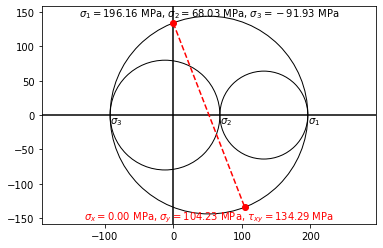

In [2]:
h.plot_mohr(params, py)

### `Iteractive plot`

Run the cell below and use the sliders to set different values for the variables, including $p$.

**Notes:** A figure with the yield surface in the $\sigma_1$ vs. $\sigma_2$ space is included at the end of the `iteractive plot`. Please keep in mind:
- The yield surface has been proyected to the $\sigma_z$ value (in general, a non-zero value) that is reached when the internal pressure causes the material yielding.
- Axis $\sigma_1$ and $\sigma_2$ in the figure (principal stresses) correspond to the rotated axis $\sigma_r$ and $\sigma_\theta$ (if a torque $T$ is applied).
- The computed values of $\sigma_1$ and $\sigma_2$ (represented as a red dot) are only valid until the material reach the yield surface (notice that the Flow Rule is not computed in this notebook).

In [3]:
%matplotlib inline
from ipywidgets import interactive, fixed
import ipywidgets as widgets

wY=widgets.IntSlider(min=50, max=500, step=50, value=500, description=r'$Y$ (MPa):')
wt=widgets.FloatSlider(min=0.5, max=10, step=0.1, value=1, description=r'$t$ (mm):')
wD=widgets.IntSlider(min=50, max=500, step=10, value=80, description=r'$D$ (mm):')
wF=widgets.IntSlider(min=0, max=50000, step=1000, value=8000, description=r'$F$ (N):')
wT=widgets.IntSlider(min=0, max=3000, step=100, value=2700, description=r'$T$ (Nm):')
wp=widgets.IntSlider(min=0, max=35, step=1, value=0, description=r'$p$ (MPa):')
ip=interactive(h.plot_mohr_mises, Y=wY, t=wt, D=wD, F=wF, T=wT, p=wp)
ip

interactive(children=(IntSlider(value=500, description='$Y$ (MPa):', max=500, min=50, step=50), FloatSlider(va…